In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,5)

# Load the Netflix dataset (uploaded manually to Colab)
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Fill missing values in important text columns
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

# Convert date column to datetime type
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month added features
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Final verification after cleaning
print("Data Info After Cleaning:")
df.info()
print("\nMissing Values After Cleaning:")
print(df.isna().sum())

Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8709 non-null   float64       
 13  month_added   8709 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory 

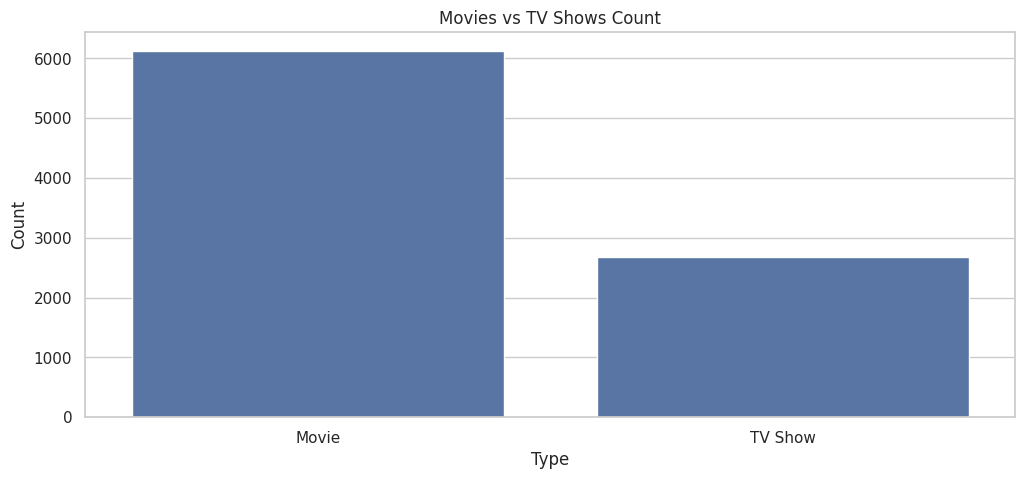

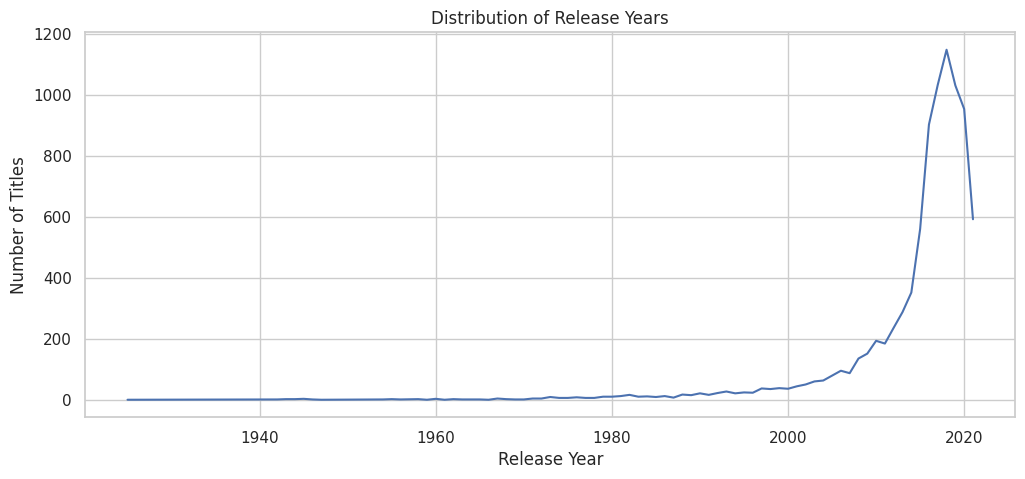

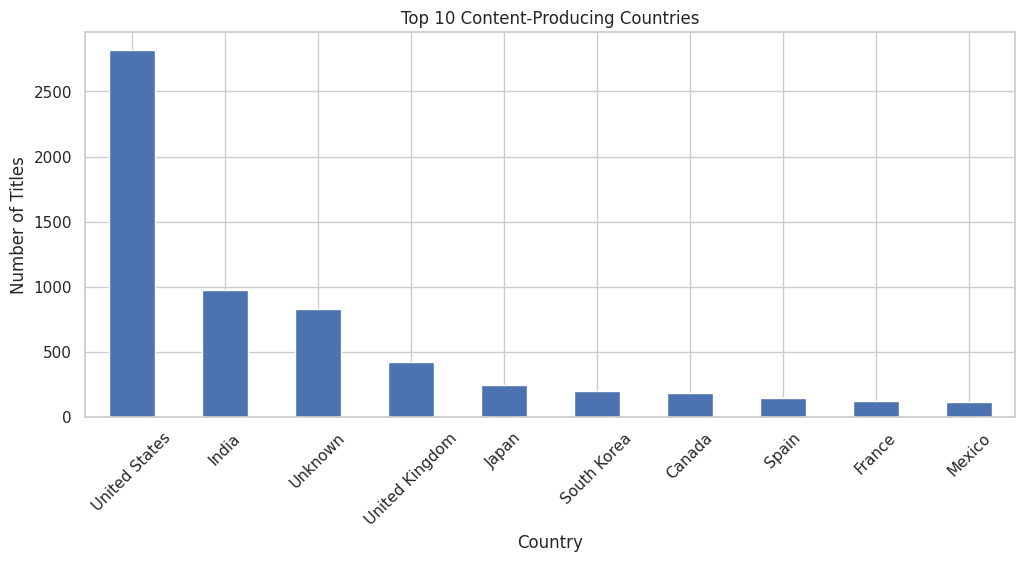

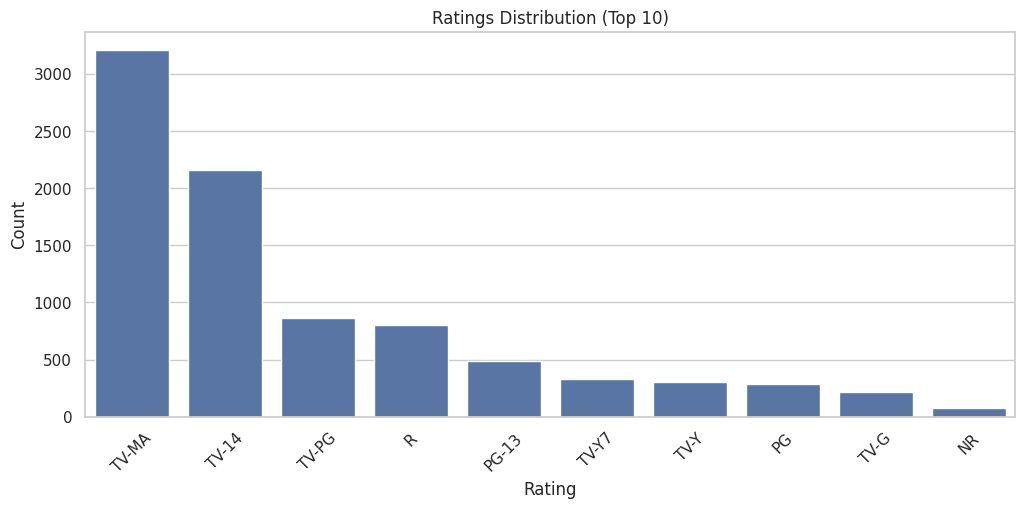

In [ ]:
# 3.1 Count of Movies vs TV Shows
plt.figure()
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows Count")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# 3.2 Release Year Distribution (Line chart)
plt.figure()
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

# 3.3 Top 10 Countries with most Netflix Content
plt.figure()
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

# 3.4 Ratings Distribution (Top 10 ratings)
plt.figure()
sns.countplot(
    data=df,
    x='rating',
    order=df['rating'].value_counts().index[:10]
)
plt.title("Ratings Distribution (Top 10)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


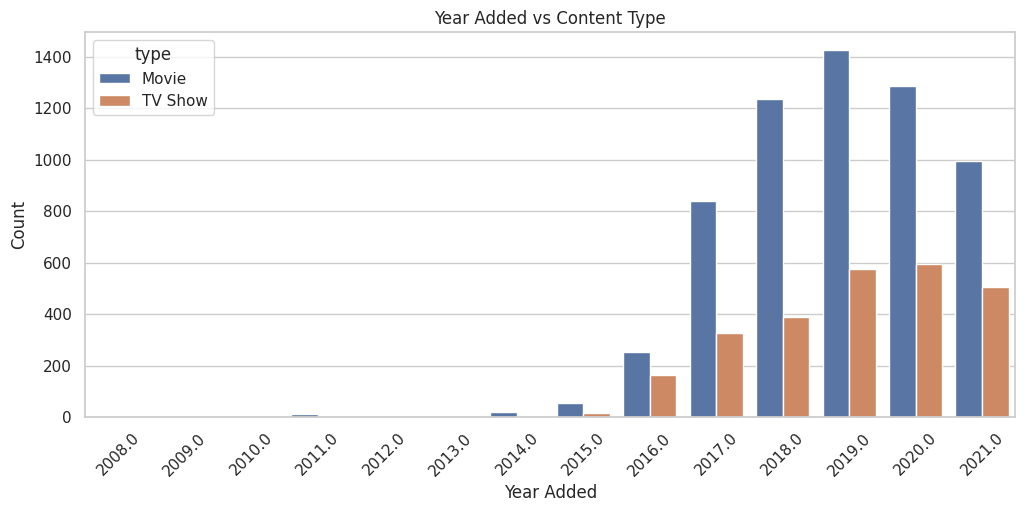

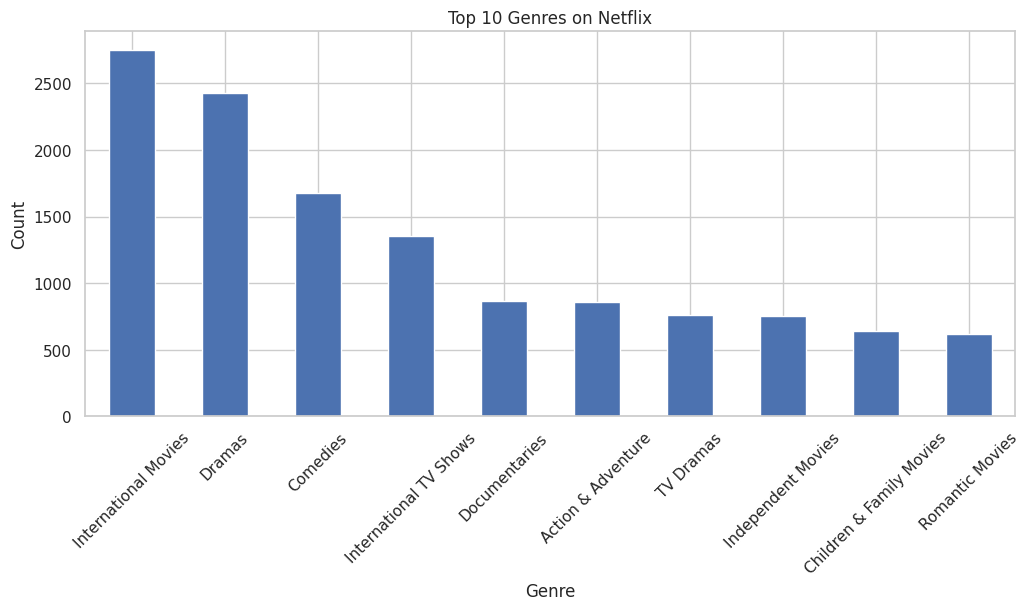

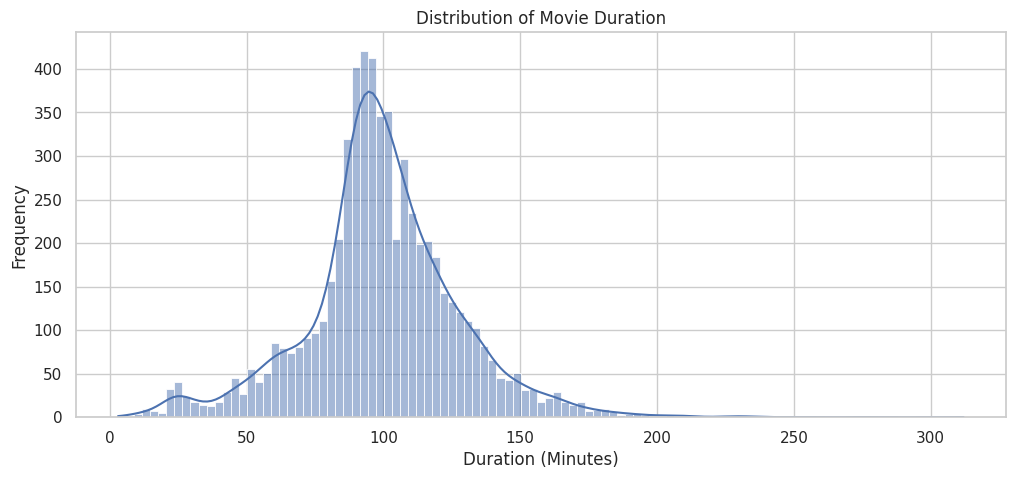

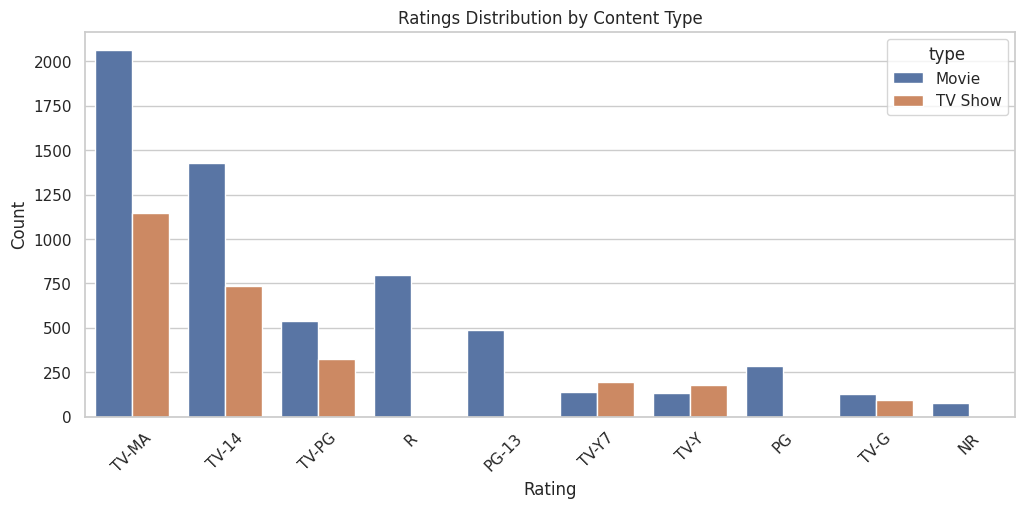

In [10]:
# 4.1 Year Added vs Type (Movies vs TV Shows over time)
plt.figure()
sns.countplot(data=df, x='year_added', hue='type')
plt.title("Year Added vs Content Type")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4.2 Top 10 Genres (Using listed_in column)
genres = df['listed_in'].str.split(', ', expand=True).stack()
plt.figure()
genres.value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4.3 Movie Duration Distribution
movies = df[df['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].str.replace(' min', '', regex=True).astype(float)

plt.figure()
sns.histplot(movies['duration'], kde=True)
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()

# 4.4 Ratings vs Type
plt.figure()
sns.countplot(
    data=df,
    x='rating',
    hue='type',
    order=df['rating'].value_counts().index[:10]
)
plt.title("Ratings Distribution by Content Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()